# Dataset avvistamenti UFO

**Attenzione**: Nelle date (campo 'datetime') è presente anche come ora 24:xx che però causa problemi con 
        tutto quello che parsa le date. Ho fatto 'sostituisci tutto' 24 -> 00 ma non è proprio corretto
        perchè bisogna anche aumentare il giorno  
**Attenzione**: Il file 'sample.csv' è il dataset 'scrubbed.csv' ma con solo 1 riga ogni 10, è meglio per testare visto che il dataset originale sono circa 80000 righe e ci mette molto per calcolare alcune cose

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from math import ceil, floor


OUT_FOLDER = 'grafici'   # il nome della cartella dove verranno salvati i .png dei grafici
FIGURE_SIZE = (20, 8)    # la dimensione dei grafici da generare

%matplotlib inline

In [51]:
DATASET = 'ufos.csv'
data = pd.read_csv(DATASET)
len(data)

80332

## Avvistamenti per ora del giorno
Qui c'è il codice per generare i grafici del numero di avvistamenti per ora del giorno. Sono più esperimenti, ci sono con tutte le ore specificate oppure con intervalli di 3 ore (leggermente shiftati per avere le 12:00 al centro).
Per modificare i colori cambiate la variabile 'gradients'

In [59]:
# Questo è leeeento
data['datetime'] = pd.to_datetime(data['datetime'])

In [5]:
counts = data['datetime'].dt.hour.value_counts()

In [6]:
hour_groups = [[23, 0, 1]] + [[h, h+1, h+2] for h in range(2, 23, 3)]
def find_group(hour):
    for i, g in enumerate(hour_groups):
        if hour in g: return i
    return -1
dt = data['datetime']
grouped_hours = dt.groupby(lambda i: find_group(dt.iloc[i].hour))
grouped_hours_counts = grouped_hours.size()

In [7]:
TITLE = 'Avvistamenti di UFO per fascia oraria'
LABELS = [f'{starth}:00 - {endh}:59' for (starth, _, endh) in hour_groups] + ['23:00-1:59']

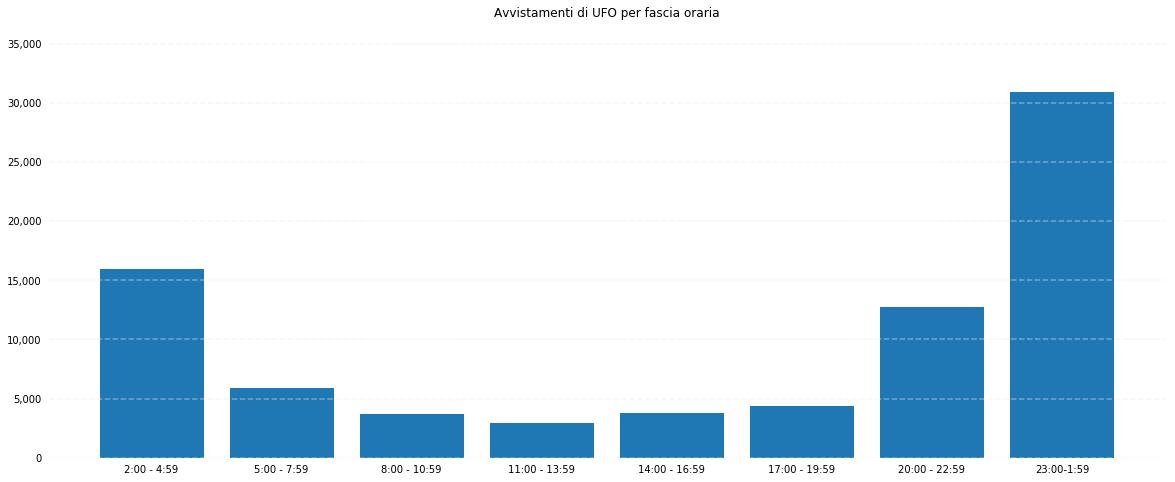

In [8]:
# Grafico degli avvistamenti per ora del giorno (a colori)

fig, ax = plt.subplots(figsize=FIGURE_SIZE)

bars = plt.bar(grouped_hours_counts.index, grouped_hours_counts.values)
for spine in ['left', 'right', 'top', 'bottom']:
    ax.spines[spine].set_visible(False)

ax.set_title(TITLE)
ax.set_xticklabels(LABELS)

# Draw vertical axis lines
vals = ax.get_yticks()
for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

ax.tick_params(
    axis="both", 
    which="both", 
    bottom=False, 
    top=False, 
    labelbottom=True, 
    left=False, 
    right=False, 
    labelleft=True
)

ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
    
plt.savefig(f'{OUT_FOLDER}/AvvistamentiOraDelGiorno/SenzaColori.png')
plt.show()

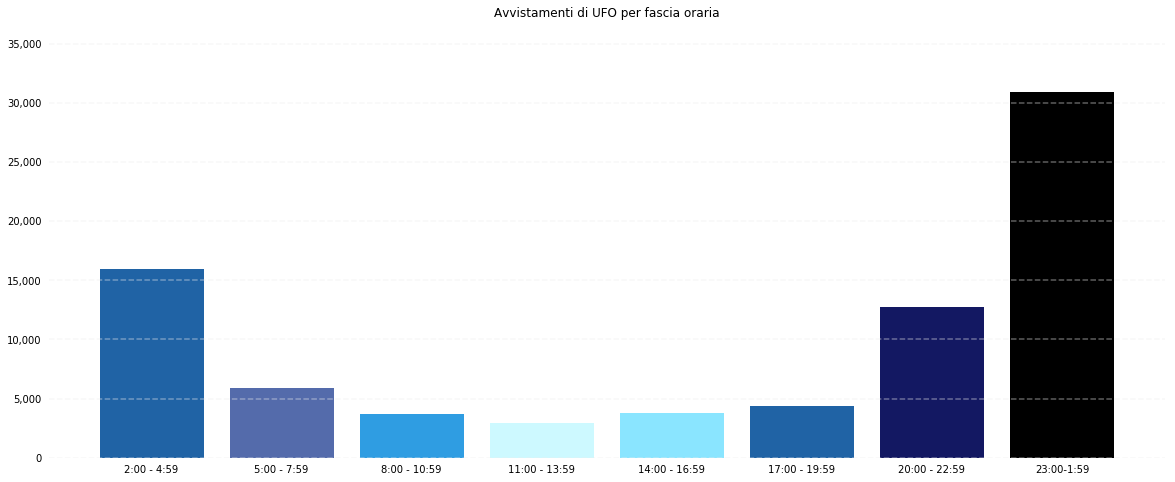

In [9]:
'''
ATTENTO: Non so perchè ma manca la label all'"ultimo". Però le barre dovrebbero iniziare 
da quella che adesso è ultima (quella che contiene mezzanotte). Prova a fixare, altrimenti 
aggiungi un elemento extra alle label alla fine
'''

fig, ax = plt.subplots(figsize=FIGURE_SIZE)
# Da [2:00, 4:59] a gruppi di 3 ore fino a [23:00, 1:59]
gradients = [
    (32,99,165), (84, 107, 171), (47,157,226), (205,249,255), 
    (138,229,255), (32,99,165), (19, 24, 98), (0, 0, 0)
]
gradients = [(r/255, g/255, b/255, 1.0) for (r, g, b) in gradients]

bars = plt.bar(grouped_hours_counts.index, grouped_hours_counts.values, color=gradients)

for spine in ['left', 'right', 'top', 'bottom']:
    ax.spines[spine].set_visible(False)

ax.set_title(TITLE)
ax.set_xticklabels(LABELS)

# Draw vertical axis lines
vals = ax.get_yticks()
for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

ax.tick_params(
    axis="both", 
    which="both", 
    bottom=False, 
    top=False, 
    labelbottom=True, 
    left=False, 
    right=False, 
    labelleft=True
)

ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

plt.savefig(f'{OUT_FOLDER}/AvvistamentiOraDelGiorno/ConColori.png')
plt.show()

## Avvistamenti UFO per anno

In [10]:
counts = data['datetime'].dt.year.value_counts()
counts = counts[counts > 100]
counts = counts.sort_index()
counts.head()

1965    188
1966    193
1967    188
1968    220
1969    155
Name: datetime, dtype: int64

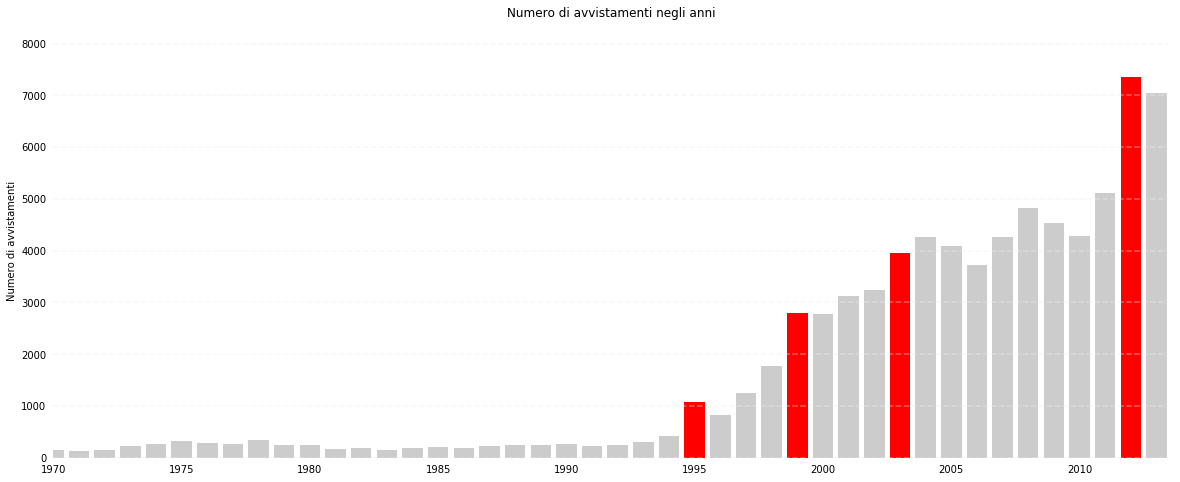

In [16]:
fig, ax = plt.subplots(figsize=FIGURE_SIZE)

# Le barre non hanno label, non posso riconoscerle come faccio nello sparklines
# Allora specifico i colori singolarmente, ripetendo il grigio eccetto per la barra rossa
colors = ['#cccccc'] * len(counts.index)

find_index = lambda x: np.where(counts.index.values == x)[0][0]

for year in [1995, 1999, 2003, 2012]:
    colors[find_index(year)] = '#ff0000'

bars = plt.bar(counts.index, counts.values, color=colors)

ax.set_ylabel('Numero di avvistamenti')
ax.set_title('Numero di avvistamenti negli anni')

for spine in ['left', 'right', 'top', 'bottom']:
    ax.spines[spine].set_visible(False)

# Switch off ticks
ax.tick_params(
    axis="both", 
    which="both", 
    bottom=False, 
    top=False, 
    labelbottom=True, 
    left=False, 
    right=False, 
    labelleft=True
)

# Draw vertical axis lines
vals = ax.get_yticks()
for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

ax.set_xlim((1970, 2013.5))
    
plt.savefig(f'{OUT_FOLDER}/AvvistamentiNegliAnni/BarChart.png')
plt.show()

# Avvistamenti UFO per nazione (in tutti gli anni)

In [17]:
countries_to_consider = {
    "us": 318,
    "ca": 35,
    "gb": 64,
    "au": 23,
    "mx": 120,
    "nz": 4.5
}
# I nomi estesi dei paesi, per creare una legenda nel grafico
countries_names = {
    "us": "Stati Uniti",
    "ca": "Canada",
    "gb": "Regno Unito",
    "au": "Australia", 
    "mx": "Mexico", 
    "in": "Indonesia",
    "nz": "Nuova Zelanda", 
    "de": "Germania"
}

country_counts = data['country'].value_counts()
country_counts['other'] = sum(country_counts < 136)
country_counts = country_counts[countries_to_consider.keys()]
for country, population in countries_to_consider.items():
    country_counts[country] /= population
country_counts = country_counts.sort_values(ascending=False)

In [18]:
TITLE = 'Nazioni con più avvistamenti UFO'
LABELS = [countries_names[country] for country in countries_to_consider.keys()]
YLABEL = XLABEL = 'Avvistamenti per milione di abitanti'
COLORS = [
    (11, 132, 165), (246, 200, 95), (157, 216, 102), (202, 71, 47), (111, 78, 124)
]
COLORS = [(r/255, g/255, b/255, 1.0) for (r, g, b) in COLORS]

In [19]:
country_counts = country_counts.head(len(COLORS))

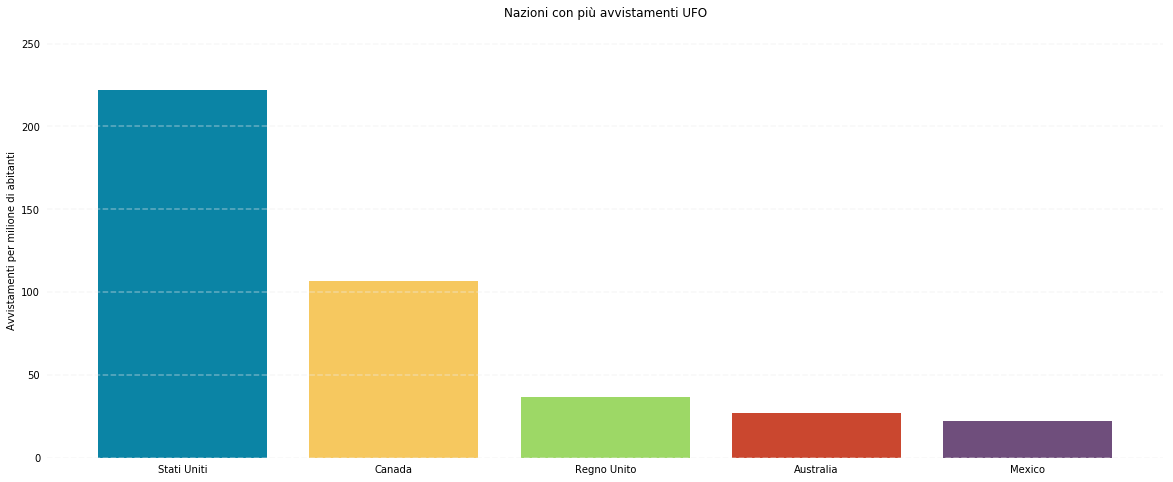

In [20]:
fig, ax = plt.subplots(figsize=FIGURE_SIZE)

bars = plt.bar(country_counts.index, country_counts.values, color=COLORS)

ax.set_xticklabels(LABELS)
ax.set_ylabel(YLABEL)
ax.set_title(TITLE)

for spine in ['left', 'right', 'top', 'bottom']:
    ax.spines[spine].set_visible(False)

# Switch off ticks
ax.tick_params(
    axis="both", 
    which="both", 
    bottom=False, 
    top=False, 
    labelbottom=True, 
    left=False, 
    right=False, 
    labelleft=True
)

# Draw vertical axis lines
vals = ax.get_yticks()
for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

plt.savefig(f'{OUT_FOLDER}/AvvistamentiPerNazione/BarChart_Verticale.png')
plt.show()

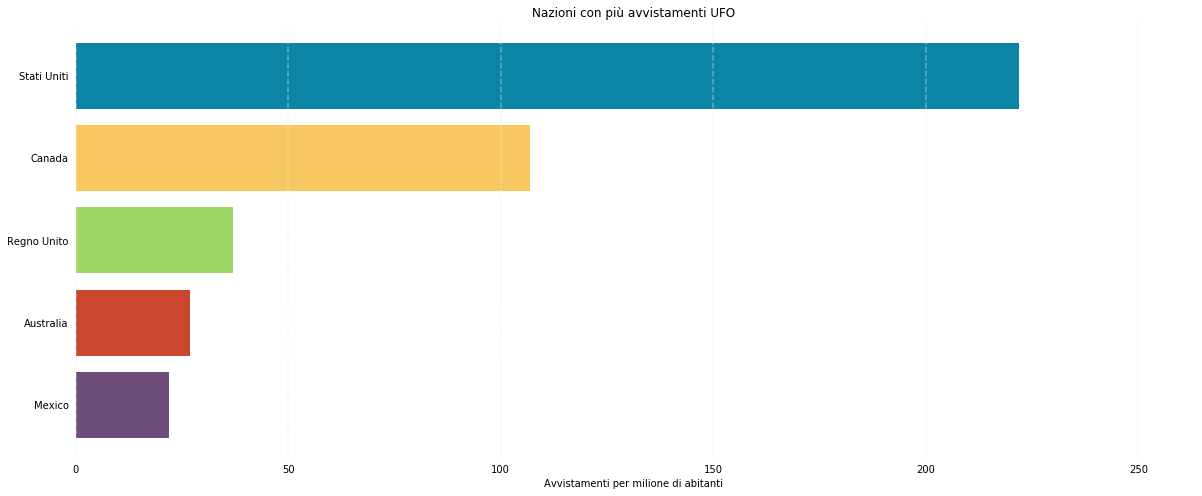

In [21]:
fig, ax = plt.subplots(figsize=FIGURE_SIZE)

colors = [
    (11, 132, 165), (246, 200, 95), (157, 216, 102), (202, 71, 47), (111, 78, 124)
]
colors = [(r/255, g/255, b/255, 1.0) for (r, g, b) in colors]

bars = ax.barh(country_counts.index, country_counts.get_values(), color=colors)

labels = [label for _, label in countries_names.items()]
# Con i subplot per qualche motivo non funzionano xticks, xlabel, title
# Bisogna usare le versioni set_*
ax.set_yticklabels(labels)
ax.set_xlabel('Avvistamenti per milione di abitanti')
ax.set_title('Nazioni con più avvistamenti UFO')

# Per fare che la barra più grande è in alto
plt.gca().invert_yaxis()

# Rimuovo i bordi del grafico
for spine in ['left', 'right', 'top', 'bottom']:
    ax.spines[spine].set_visible(False)

# Switch off ticks
ax.tick_params(
    axis="both", 
    which="both", 
    bottom=False, 
    top=False, 
    labelbottom=True, 
    left=False, 
    right=False, 
    labelleft=True
)

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

plt.savefig(f'{OUT_FOLDER}/AvvistamentiPerNazione/BarChart_Orizzontale.png')
plt.show()

# Avvistamenti medi mensili nel tempo

In [24]:
def get_season(m):
    if m == 12 or m <= 2: 
        return 1 # inverno
    elif 3 <= m <= 5:
        return 2 # primavera
    elif 6 <= m <= 8:
        return 3 # estate
    elif 9 <= m <= 11:
        return 4 # autunno
    

def datetime2months(iloc):
    x = data['datetime'].iloc[iloc]
    return date2months(x.year, x.month)

year_month_group = data['datetime'].groupby(datetime2months)
monthly_averages = pd.Series(dtype=float)

counts = year_month_group.size()
for year in map(str, range(1930, 2015)):
    total = 0
    for month in map(str, range(1, 13)):
        m = date2months(year, month)
        if m not in counts.index:
            total = -1
            break
        total += counts.loc[m]
    # Non ci sono tutti i mesi per questo anno, lo scartiamo
    if total > 0:
        monthly_averages.loc[date2months(year, 1)] = total / 12.0

In [41]:
YEAR_SHIFT = 1906

YEAR_RANGE = (1985, 2012)

def date2months(y, m):
    return 4 * (int(y) - 1906) + get_season(int(m))

def date2index(year, season):
    return 4 * (int(year) - YEAR_SHIFT)  + int(season)

def get_season(m):
    m = int(m)
    if m == 12 or m <= 2: 
        return 0 # inverno
    elif 3 <= m <= 5:
        return 1 # primavera
    elif 6 <= m <= 8:
        return 2 # estate
    elif 9 <= m <= 11:
        return 3 # autunno

def dt_helper(index):
    h = data['datetime'].iloc[index]
    return date2index(h.year, get_season(h.month))

counts = data['datetime'].groupby(dt_helper).size()
seasons_averages = pd.Series(dtype=float)

for year in range(*YEAR_RANGE):
    total = 0
    for season in range(0, 4):  # le stagioni sono 0, 1, 2, 3
        m = date2index(year, season)
        if m not in counts.index:
            total = -1
            break
        total += counts.loc[m]
    if total > 0:
        seasons_averages.loc[date2index(year, 0)] = total / 4.0

In [42]:
monthly_averages = monthly_averages.sort_index()
counts = counts.sort_index()

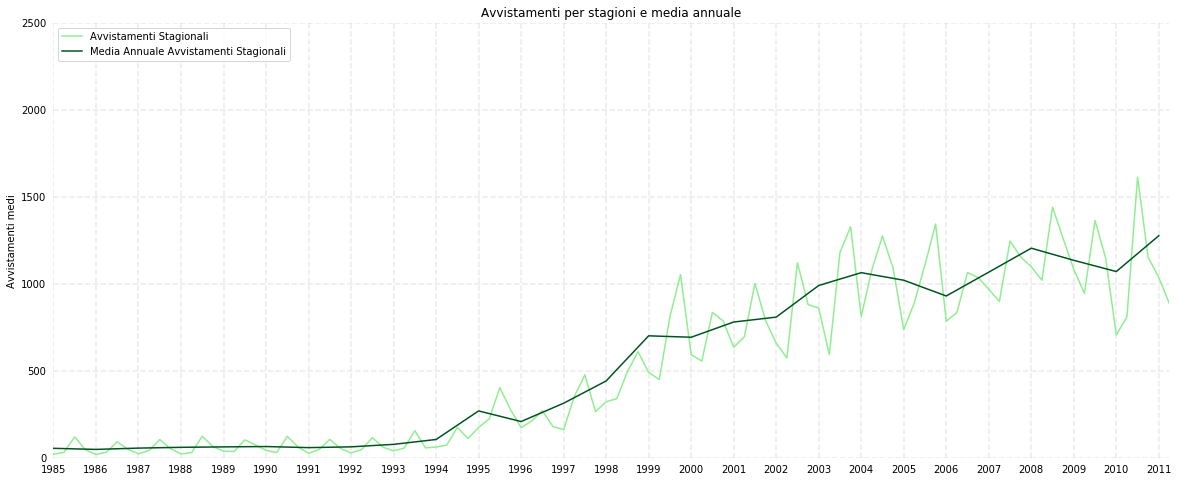

In [49]:
plt.figure(figsize=FIGURE_SIZE)

DARK_COLOR = '#90ee90'
LIGHT_COLOR = '#005221'

ax1 = counts.plot(color=DARK_COLOR, label='Avvistamenti Stagionali')
ax2 = seasons_averages.plot(color=LIGHT_COLOR, label='Media Annuale Avvistamenti Stagionali')

plt.legend()

get_original_year = lambda x: floor(x / 4) + YEAR_SHIFT

year_labels = [str(get_original_year(x)) for x in seasons_averages.index]
plt.xticks(seasons_averages.index, year_labels)

interval_to_show = (date2months(YEAR_RANGE[0], 1), date2months(YEAR_RANGE[1]-1, 4))
ax1.set_xlim(interval_to_show)
ax2.set_xlim(interval_to_show)

ax1.set_ylim((0, 2500))
ax2.set_ylim((0, 2500))

# Rimuovo i bordi del grafico
for spine in ['left', 'right', 'top', 'bottom']:
    ax1.spines[spine].set_visible(False)

# Switch off ticks
ax1.tick_params(
    axis="both", 
    which="both", 
    bottom=False, 
    top=False, 
    labelbottom=True, 
    left=False, 
    right=False, 
    labelleft=True
)

COLOR_LINE = '#cccccc'

vals = ax2.get_xticks()
for tick in vals:
    ax2.axvline(x=tick, linestyle='dashed', alpha=0.4, color=COLOR_LINE, zorder=1)

vals = ax2.get_yticks()
for tick in vals:
    ax2.axhline(y=tick, linestyle='dashed', alpha=0.4, color=COLOR_LINE, zorder=1)
    
plt.title('Avvistamenti per stagioni e media annuale')
plt.ylabel('Avvistamenti medi')

plt.savefig(f'{OUT_FOLDER}/AvvistamentiMedi/LineChart.png')
plt.show()

# Avvistamenti UFO negli anni per paese
Questi che seguono rappresentano la stessa cosa, il numero di avvistamenti negli anni per paese. I dati sono stati normalizzati per milioni di abitanti per paese. I paesi scelti sono quelli che hanno un po' di avvistamenti (almeno 10, circa). 
I grafici qui sono (in ordine):
- A linee
- A linee in small multiple
- Barchart verticale
- Barchart orizzontale

In [ ]:
# Questi dati servono per creare i grafici che seguono sugli avvistamenti negli anni per paesi diversi
# popolazione e milioni di abitanti (nel 2014)
countries_to_consider = {
    "us": 318,
    "ca": 35,
    "gb": 64,
    "au": 23,
    "in": 255,
    "mx": 120,
    "nz": 4.5,
    "nl": 16.8,
    "br": 202.8
    
    #"ie": ,
    #"jp": ,
    #"cl": ,
    #"hu": ,
    #"cn": ,
    #"se": ,
    #"co": ,
    #"be": ,
    #"de": ,
    #"my": ,
    #"es": ,
    #"il"
}

# I nomi estesi dei paesi, per creare una legenda nel grafico
countries_names = {
    "us": "Stati Uniti",
    "ca": "Canada",
    "gb": "Regno Unito",
    "au": "Australia",
    "in": "Indonesia",
    "mx": "Mexico",
    "nz": "Nuova Zelanda",
    "nl": "Paesi Bassi",
    "br": "Brasile",
    "ie": "Irlanda",
    "za": "Sud Africa"
    
}

countries_data = pd.crosstab(
    data['datetime'].dt.year, 
    data['country']
).loc[:, countries_to_consider.keys()]

# Normalizza per popolazione
for country, population in countries_to_consider.items():
    countries_data[country] /= population

In [ ]:
TITLE = 'Avvistamenti di UFO negli anni'
YLABEL = 'Avvistamenti per milione di abitanti'

In [ ]:
fig, ax = plt.subplots()

countries_data.plot(figsize=FIGURE_SIZE, xlim=(1985, 2014), ax=ax)
ax.set_title(TITLE)
ax.set_ylabel(YLABEL)

for label in ax.legend().get_texts():
    label.set_text(countries_names[label.get_text()])

# Rimuovo i bordi del grafico
for spine in ['left', 'right', 'top', 'bottom']:
    ax.spines[spine].set_visible(False)

# Switch off ticks
ax.tick_params(
    axis="both", 
    which="both", 
    bottom=False, 
    top=False, 
    labelbottom=True, 
    left=False, 
    right=False, 
    labelleft=True
)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

plt.savefig(f'{OUT_FOLDER}/AvvistamentiUSALineChart/MultiColor.png')
plt.show()

In [ ]:
fig, ax = plt.subplots()

graph = countries_data.plot(figsize=FIGURE_SIZE, xlim=(1985, 2014), ax=ax)
ax.set_title(TITLE)
ax.set_ylabel(YLABEL)
ax.get_legend().remove()

# Rimuovo i bordi del grafico
for spine in ['left', 'right', 'top', 'bottom']:
    ax.spines[spine].set_visible(False)

# Switch off ticks
ax.tick_params(
    axis="both", 
    which="both", 
    bottom=False, 
    top=False, 
    labelbottom=True, 
    left=False, 
    right=False, 
    labelleft=True
)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

US_LINE_COLOR = (1, 0, 0, 1)
for line in graph.get_lines():
    if line.get_label() != "us": 
        line.set_color("#cccccc")
    else:
        line.set_color(US_LINE_COLOR)

plt.savefig(f'{OUT_FOLDER}/AvvistamentiUSALineChart/SingoloColore.png')
plt.show()

In [ ]:
# Versione con small multiples
# ATTENTO: Sul notebook le scritte degli assi sembrano sbagliate, ma se guardi l'immagine generatasono giuste!

fig, axes = plt.subplots(
    nrows=2, 
    ncols=2, 
    sharex=True, 
    sharey=True, 
    figsize=FIGURE_SIZE
)

# 'ax' normalmente è una lista di liste. così lo converto in una lista normale
ax = [item for sublist in axes for item in sublist] 

for country, ax in zip(countries_to_consider.keys(), ax):
    countries_data[country].plot(ax=ax)
    ax.set_title(countries_names[country])
    ax.set_xlim((1985, 2014))
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.text(0.5, 0.04, 'Anni di avvistamento', ha='center')
fig.text(0.089, 0.5, 'Avvistamenti per milione di persone', va='center', rotation='vertical')
    
plt.savefig(f'{OUT_FOLDER}/AvvistamentiPerNazioneNegliAnni/Lines_SmallMultiple.png')
plt.tight_layout()
plt.show()

In [ ]:
# Versione bar chart
# ATTENTO: Sul notebook le scritte degli assi sembrano sbagliate, ma se guardi l'immagine generata sono giuste!

fig, axes = plt.subplots(
    nrows=2, 
    ncols=2, 
    sharex=True, 
    sharey=True, 
    figsize=FIGURE_SIZE
)

# 'ax' normalmente è una lista di liste. così lo converto in una lista normale
axes = [item for sublist in axes for item in sublist] 

for country, ax in zip(countries_to_consider.keys(), axes):
    ax.bar(countries_data[country].index, countries_data[country].get_values())
    ax.set_title(countries_names[country])
    ax.set_xlim((1985, 2014))
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.text(0.5, 0.04, 'Anni di avvistamento', ha='center')
fig.text(0.089, 0.5, 'Avvistamenti per milione di persone', va='center', rotation='vertical')

plt.savefig(f'{OUT_FOLDER}/AvvistamentiPerNazioneNegliAnni/BarChart_Verticale.png')
plt.tight_layout()
plt.show()

In [ ]:
# Versione bar chart in orizzontale
# ATTENTO: Sul notebook le scritte degli assi sembrano sbagliate, ma se guardi l'immagine generata sono giuste!

fig, axes = plt.subplots(
    nrows=2, 
    ncols=2, 
    sharex=True, 
    sharey=True, 
    figsize=FIGURE_SIZE
)

# 'axes' normalmente è una lista di liste. così lo converto in una lista normale
axes = [item for sublist in axes for item in sublist] 

for country, ax in zip(countries_to_consider.keys(), axes):
    ax.barh(countries_data[country].index, countries_data[country].get_values())
    ax.set_title(countries_names[country])
    ax.set_ylim((1985, 2014))
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.text(0.5, 0.04, 'Anni di avvistamento', ha='center')
fig.text(0.089, 0.5, 'Avvistamenti per milione di persone', va='center', rotation='vertical')
    
plt.savefig(f'{OUT_FOLDER}/AvvistamentiPerNazioneNegliAnni/BarChart_Orizzontale.png')
plt.tight_layout()
plt.show()

# Quanto dura un'avvistamento?
Alcuni grafici che mostrano quanto durano gli avvistamenti e se è cambiata la durata nel tempo

In [ ]:
bins = [0, 10, 30, 60 * 1, 60 * 2, 60 * 5, 60 * 15, 60*60, 60*60 * 4, 60*60*24, 10000000000]
def find_bin(x):
    for i in range(len(bins[:-1])):
        if bins[i] <= x < bins[i+1]:
            return i
    return len(bins)
counts = data['duration (seconds)'].groupby(find_bin).size()

def between(a, b):
    return len(data[(data['duration (seconds)'] >= a) & (data['duration (seconds)'] < b)])

counts = [between(bins[i], bins[i+1]) for i in range(len(bins[:-1]))]

In [ ]:
TITLE = 'Durata degli avvistamenti'
YLABEL = 'Numero di avvistamenti'
XLABEL = "Durata dell'avvistamento"
LABELS = ['10 secondi', '30 secondi', '1 minuto', '2 minuti', '5 minuti', '15 minuti', '1 ora', '4 ore', '1 giorno', 'di più']

In [ ]:
fig, ax = plt.subplots(figsize=FIGURE_SIZE)

bars = ax.bar(range(len(counts)), counts)

ax.set_xticks(range(len(LABELS)))
ax.set_xticklabels(LABELS)
ax.set_title(TITLE)
ax.set_ylabel(YLABEL)
ax.set_xlabel(XLABEL)

for spine in ['left', 'right', 'top', 'bottom']:
    ax.spines[spine].set_visible(False)

# Switch off ticks
ax.tick_params(
    axis="both", 
    which="both", 
    bottom=False, 
    top=False, 
    labelbottom=True, 
    left=False, 
    right=False, 
    labelleft=True, 
)

# Draw vertical axis lines
vals = ax.get_yticks()
for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

plt.savefig(f'{OUT_FOLDER}/DurataAvvistamenti/BarChart.png')
plt.show()

# Frequenza delle parole
Calcoliamo quali parole sono più frequenti nel campo 'comment'

In [3]:
import re
from collections import defaultdict

# compiliamo la regex per performance
words_re = re.compile('[a-zA-Z0-9]+')

def tokenize(comment):
    return words_re.findall(comment)

occurrencies = defaultdict(int)
for iloc, comment in data['comments'].dropna().iteritems():
    for word in tokenize(comment):
        occurrencies[word] += 1
occurrencies = pd.Series(occurrencies)

# Rimuoviamo un po' di articoli e parole noiose
WORDS_TO_FILTER = [
    'the', 'in', 'a', 'and', 'of', 'i', 'to', 'was', 'at', 'it', 'with', 'over', 'on', 'then', 'from', 'my', 'saw', 'like', 'that', 
    '3', '2', 'no', 'for', 'very', 'seen', 'we', 'white', 'were'
]
occurrencies = occurrencies.drop(labels=WORDS_TO_FILTER)
# Sommiamo 'light' e 'lights' e 'objects' e 'object' che si riferiscono alla stessa parola
occurrencies['lights'] += occurrencies['light']
occurrencies['objects'] += occurrencies['object']
occurrencies = occurrencies.drop(labels=['light', 'object'])

occurrencies = occurrencies.sort_values(ascending=False).head(20)  # prendiamo solo le prime 20 parole

In [ ]:
fig, ax = plt.subplots(figsize=FIGURE_SIZE)

bars = ax.barh(occurrencies.index, occurrencies.values, color='#aaaaaa')

ax.set_title('Parole più usate nelle descrizioni degli avvistamenti')

# Per fare che la barra più grande è in alto
plt.gca().invert_yaxis()

# Rimuovo i bordi del grafico
for spine in ['left', 'right', 'top', 'bottom']:
    ax.spines[spine].set_visible(False)

# Switch off ticks
ax.tick_params(
    axis="both", 
    which="both", 
    bottom=False, 
    top=False, 
    labelbottom=True, 
    left=False, 
    right=False, 
    labelleft=True
)

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

plt.savefig(f'{OUT_FOLDER}/FrequenzaParole/BarChar_Orizzontale.png')
plt.show()

# Forme UFO
Alcuni grafici con le forme di UFO più comuni. Il codice è lo stesso di quello dei grafici sopra

In [4]:
shape_counts = data['shape'].value_counts()
# Sommiamo tutti i valori con < 10 casi in un unico 'other'
small_values = shape_counts[shape_counts < 10]
total = sum(small_values)
shape_counts = shape_counts.drop(index=small_values.index)
shape_counts['other'] = total
shape_counts = shape_counts.sort_values(ascending=False)

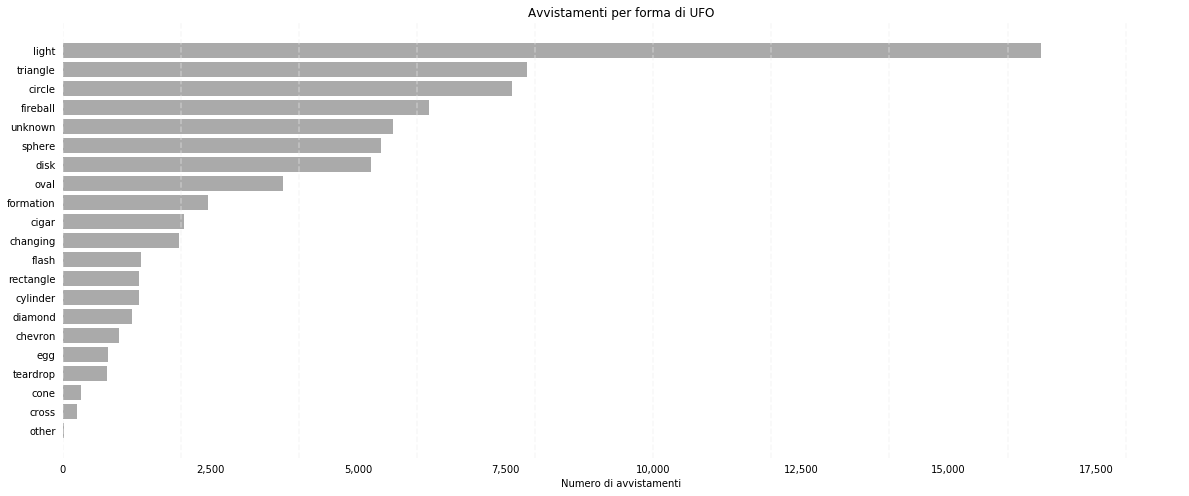

In [6]:
fig, ax = plt.subplots(figsize=FIGURE_SIZE)

shape_bars = ax.barh(shape_counts.index, shape_counts.values, color='#aaaaaa')

ax.set_title('Avvistamenti per forma di UFO')
ax.set_xlabel('Numero di avvistamenti')

for spine in ['left', 'right', 'top', 'bottom']:
    ax.spines[spine].set_visible(False)
ax.invert_yaxis()
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
ax.tick_params(
    axis="both", 
    which="both", 
    bottom=False, 
    top=False, 
    labelbottom=True, 
    left=False, 
    right=False, 
    labelleft=True
)
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

plt.savefig(f'{OUT_FOLDER}/AvvistamentiPerForma/AvvistamentiPerForma.png')
plt.show()

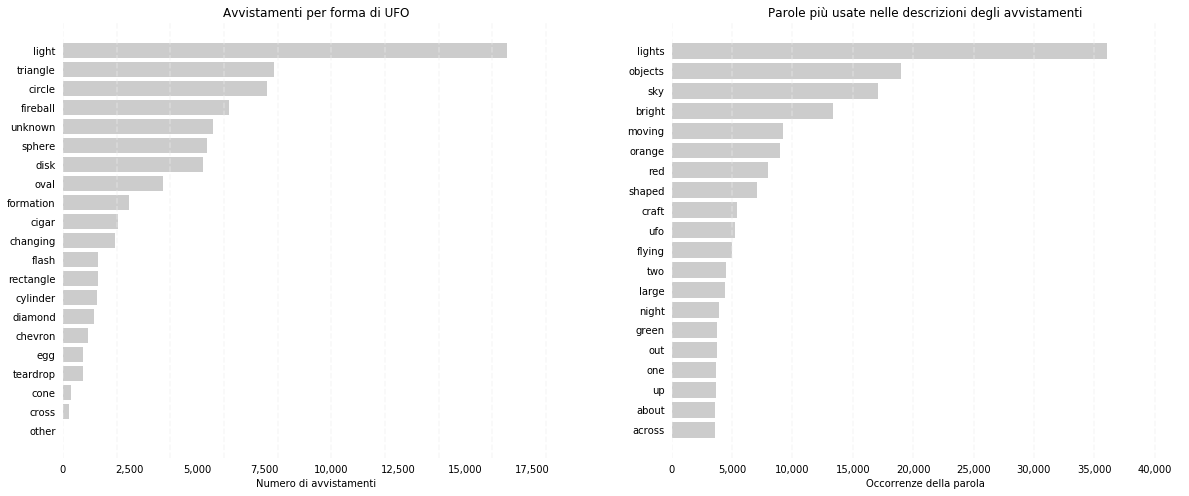

In [7]:
fig, (ax, bx) = plt.subplots(nrows=1, ncols=2, figsize=FIGURE_SIZE)

GRAY = '#cccccc'

shape_bars = ax.barh(shape_counts.index, shape_counts.values, color=GRAY)

colors = [GRAY] * len(occurrencies.index)
find_index = lambda x: np.where(occurrencies.index.values == x)[0][0]

words_bars = bx.barh(occurrencies.index, occurrencies.values, color=colors)

ax.set_title('Avvistamenti per forma di UFO')
ax.set_xlabel('Numero di avvistamenti')

bx.set_title('Parole più usate nelle descrizioni degli avvistamenti')
bx.set_xlabel('Occorrenze della parola')

for ax in [ax, bx]:
    for spine in ['left', 'right', 'top', 'bottom']:
        ax.spines[spine].set_visible(False)
    ax.invert_yaxis()
    ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
    ax.tick_params(
        axis="both", 
        which="both", 
        bottom=False, 
        top=False, 
        labelbottom=True, 
        left=False, 
        right=False, 
        labelleft=True
    )
    vals = ax.get_xticks()
    for tick in vals:
        ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
        
plt.savefig(f'{OUT_FOLDER}/AvvistamentiPerForma/ConfrontoConParole_NoColor.png')
plt.show()

In [ ]:
fig, (ax, bx) = plt.subplots(nrows=1, ncols=2, figsize=FIGURE_SIZE)

GRAY = '#cccccc'

shape_bars = ax.barh(shape_counts.index, shape_counts.values, color=GRAY)

colors = [GRAY] * len(occurrencies.index)
find_index = lambda x: np.where(occurrencies.index.values == x)[0][0]

colors[find_index('green')] = '#59bf5b'
colors[find_index('orange')] = '#ffa500'
colors[find_index('red')] = '#ca472f'


words_bars = bx.barh(occurrencies.index, occurrencies.values, color=colors)

ax.set_title('Avvistamenti per forma di UFO')
ax.set_xlabel('Numero di avvistamenti')

bx.set_title('Parole più usate nelle descrizioni degli avvistamenti')
bx.set_xlabel('Occorrenze della parola')

for ax in [ax, bx]:
    for spine in ['left', 'right', 'top', 'bottom']:
        ax.spines[spine].set_visible(False)
    ax.invert_yaxis()
    ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
    ax.tick_params(
        axis="both", 
        which="both", 
        bottom=False, 
        top=False, 
        labelbottom=True, 
        left=False, 
        right=False, 
        labelleft=True
    )
    vals = ax.get_xticks()
    for tick in vals:
        ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
        
plt.savefig(f'{OUT_FOLDER}/AvvistamentiPerForma/ConfrontoConParole.png')
plt.show()

## Avvistamenti per giorno dell'anno

In [ ]:
from datetime import date, timedelta

def days_in_year(dt):
    start = date(dt.year, 1, 1)
    end = date(dt.year, dt.month, dt.day)
    return (end - start).days

days_since_year = []
for iloc, dt in data['datetime'].iteritems():
    days_since_year.append(days_in_year(dt))
data['DaysSinceYear'] = pd.Series(days_since_year, index=data.index)

In [73]:
from datetime import date, timedelta


date(2013, 1, 1) + timedelta(days=150)

datetime.date(2013, 5, 31)

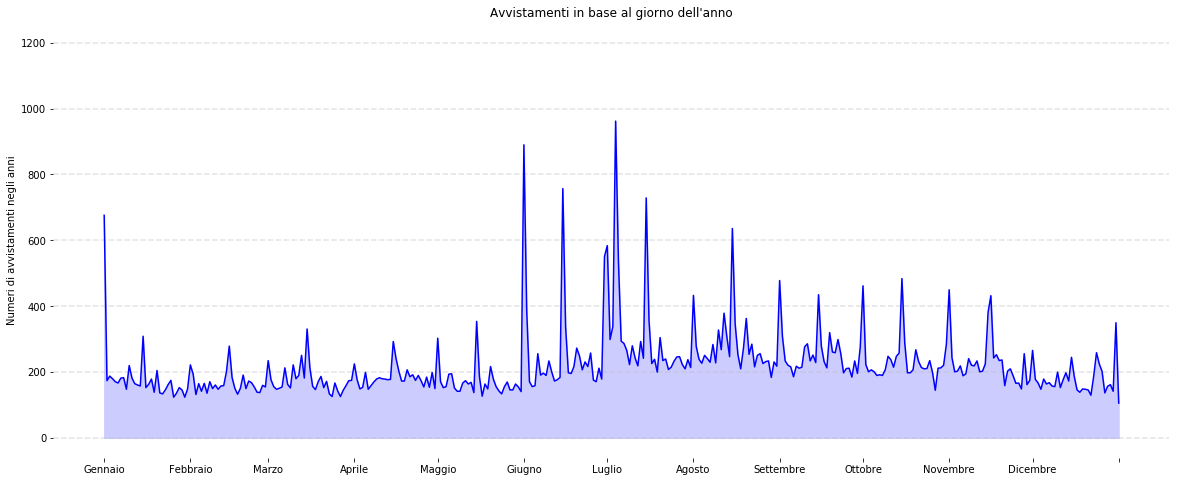

In [97]:
fig, ax = plt.subplots(figsize=FIGURE_SIZE)

# LIGHT_COLOR = '#CCCCFF'
# DARK_COLOR = '#0000ff'

DARK_COLOR = '#90ee90'
LIGHT_COLOR = '#005221'


counts = data['DaysSinceYear'].value_counts().sort_index()

ax.plot(counts.index, counts.values, color=DARK_COLOR)

days_for_month = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365]
ax.set_xticks(days_for_month)
ax.set_xticklabels([
    'Gennaio', 'Febbraio', 'Marzo', 'Aprile', 
    'Maggio', 'Giugno', 'Luglio', 'Agosto', 
    'Settembre', 'Ottobre', 'Novembre', 'Dicembre'
])

ax.set_title('Avvistamenti in base al giorno dell\'anno')
ax.set_ylabel('Numeri di avvistamenti negli anni')

for spine in ['left', 'right', 'top', 'bottom']:
        ax.spines[spine].set_visible(False)

vals = ax.get_yticks()
for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#bbbbbb', zorder=1)
        
ax.fill_between(counts.index, 0, counts.values, color=LIGHT_COLOR)

plt.savefig(f'{OUT_FOLDER}/AvvistamentiPerGiorno/LineChart.png')
plt.show()

In [82]:
counts.sort_values(ascending=False).head(20)

184    962
151    890
165    757
195    729
0      676
226    636
181    584
180    551
185    539
287    484
243    478
273    462
304    450
257    435
212    433
319    432
152    389
318    382
223    379
231    363
Name: DaysSinceYear, dtype: int64

In [85]:
x = [184, 151, 165, 195, 0, 226, 181, 180, 185, 287, 243]
for i in x:
    print(date(2019, 1, 1) + timedelta(days=i))

2019-07-04
2019-06-01
2019-06-15
2019-07-15
2019-01-01
2019-08-15
2019-07-01
2019-06-30
2019-07-05
2019-10-15
2019-09-01
